In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# Set style for plots
plt.style.use('default')
sns.set_palette("husl")

In [3]:
data_df = pd.read_csv('data/premier_league_standings_filtered.csv')
data_df.head()

,Rk,Squad,Pts,W,D,L,GD,GF,GA,xG,# Pl_2024,Age_2024,Poss_2024,# Pl_2025,Age_2025,Poss_2025
0,1,Liverpool,84,25,9,4,45,86,41,82.2,24,27.2,57.7,20.0,27.1,58.7
1,2,Arsenal,74,20,14,4,35,69,34,59.9,25,25.8,56.9,21.0,25.7,51.0
2,3,Manchester City,71,21,8,9,28,72,44,68.1,30,26.8,61.3,19.0,25.7,60.7
3,4,Chelsea,69,20,9,9,21,64,43,67.8,29,23.7,57.1,19.0,24.4,61.0
4,5,Newcastle Utd,66,20,6,12,21,68,47,63.8,24,27.4,51.3,18.0,28.3,51.3


In [4]:
# Filter out teams without 2025 data
df_2025 = data_df.dropna(subset=['# Pl_2025', 'Age_2025', 'Poss_2025']).copy()
df_2025.shape

(17, 16)

In [5]:
# Calculate changes from 2024 to 2025
df_2025['Age_Change'] = df_2025['Age_2025'] - df_2025['Age_2024']
df_2025['Poss_Change'] = df_2025['Poss_2025'] - df_2025['Poss_2024']
df_2025['Squad_Size_Change'] = df_2025['# Pl_2025'] - df_2025['# Pl_2024']

In [6]:
# Create a simple prediction model
# We'll use multiple factors to predict next season's performance
factors = ['Pts', 'GD', 'xG', 'Age_2025', 'Poss_2025']
X = df_2025[factors]
y = df_2025['Pts']  # Using current points as base

In [7]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_scaled, y)

LinearRegression()

In [9]:
# Predict next season points
df_2025['Predicted_Pts'] = model.predict(X_scaled)

In [10]:
# Add some randomness to simulate uncertainty
np.random.seed(42)
randomness = np.random.normal(0, 3, len(df_2025))
df_2025['Predicted_Pts'] += randomness


In [11]:
# Sort by predicted points
df_2025 = df_2025.sort_values('Predicted_Pts', ascending=False)
df_2025['Predicted_Rank'] = range(1, len(df_2025) + 1)

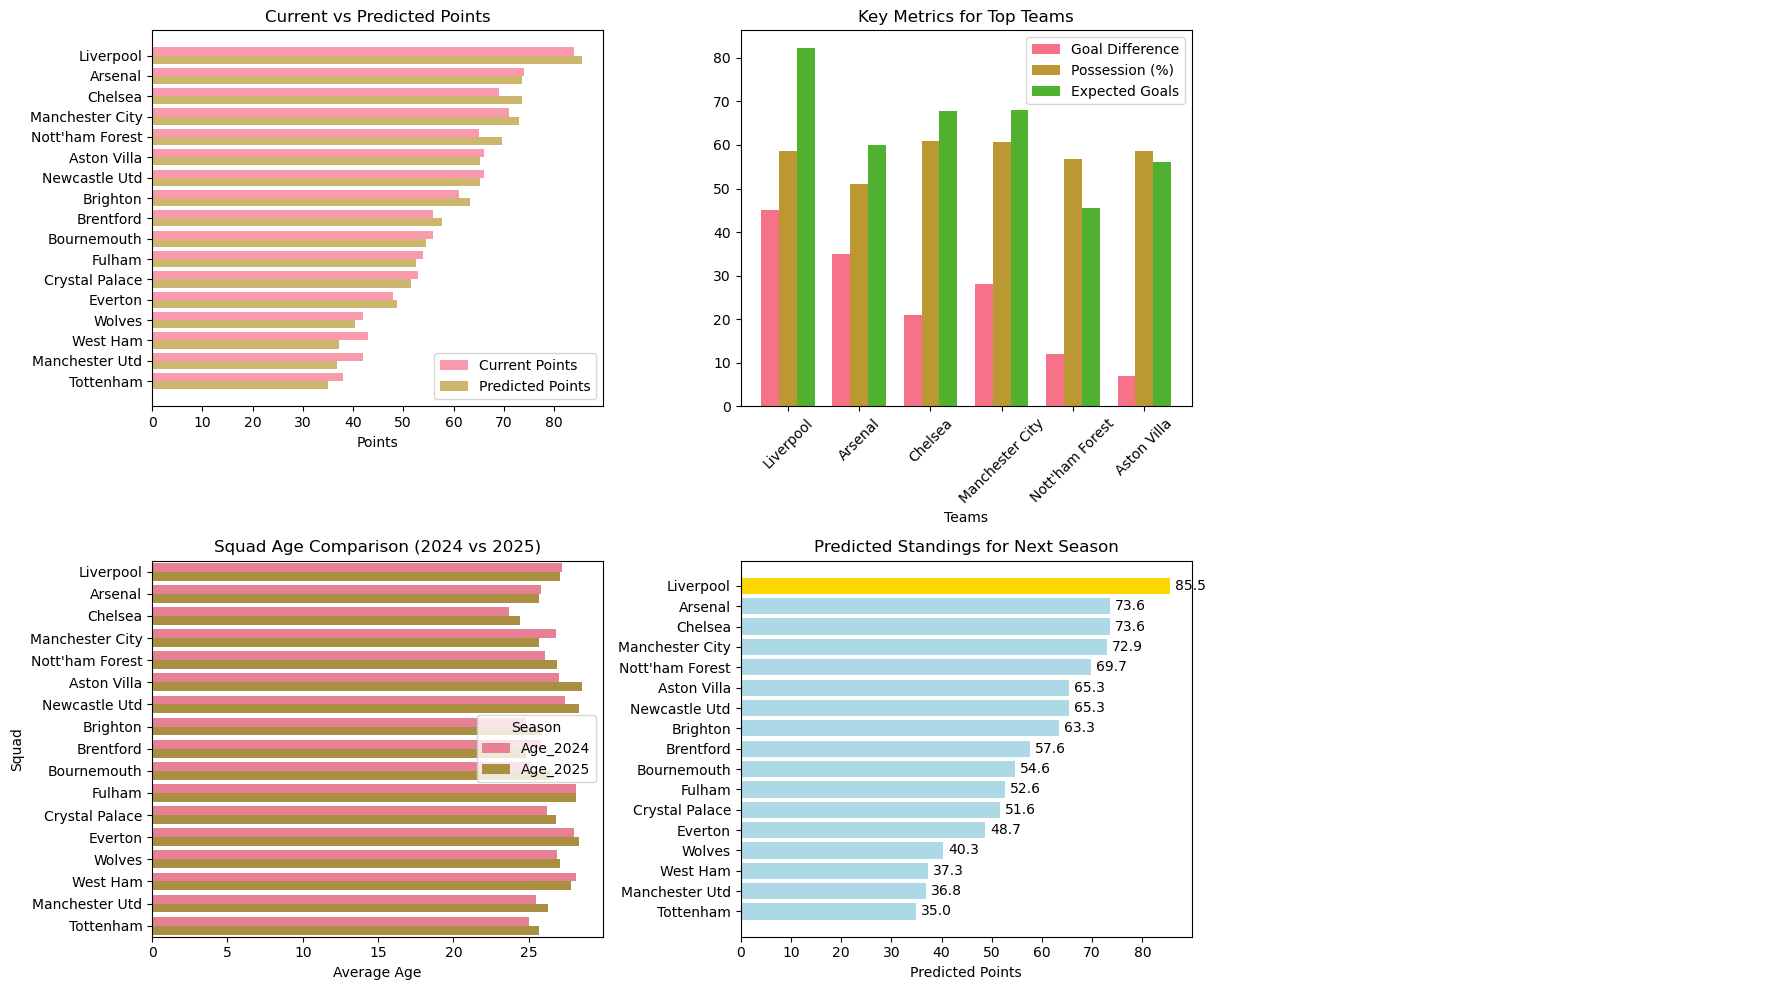

In [20]:
# Create a 2x3 grid of subplots (to match the shape of axes in your notebook)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot 1: Current vs Predicted Points
y_pos = np.arange(len(df_2025))
axes[0, 0].barh(y_pos - 0.2, df_2025['Pts'], height=0.4, alpha=0.7, label='Current Points')
axes[0, 0].barh(y_pos + 0.2, df_2025['Predicted_Pts'], height=0.4, alpha=0.7, label='Predicted Points')
axes[0, 0].set_yticks(y_pos)
axes[0, 0].set_yticklabels(df_2025['Squad'])
axes[0, 0].set_xlabel('Points')
axes[0, 0].set_title('Current vs Predicted Points')
axes[0, 0].legend()
axes[0, 0].invert_yaxis()

# Plot 2: Key metrics for top teams
top_teams = df_2025.head(6)
x = np.arange(len(top_teams))
width = 0.25

axes[0, 1].bar(x - width, top_teams['GD'], width, label='Goal Difference')
axes[0, 1].bar(x, top_teams['Poss_2025'], width, label='Possession (%)')
axes[0, 1].bar(x + width, top_teams['xG'], width, label='Expected Goals')
axes[0, 1].set_xlabel('Teams')
axes[0, 1].set_title('Key Metrics for Top Teams')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(top_teams['Squad'], rotation=45)
axes[0, 1].legend()

# Plot 3: Squad age comparison
age_data = df_2025[['Squad', 'Age_2024', 'Age_2025']].melt(id_vars='Squad', var_name='Season', value_name='Age')
sns.barplot(data=age_data, x='Age', y='Squad', hue='Season', ax=axes[1, 0])
axes[1, 0].set_title('Squad Age Comparison (2024 vs 2025)')
axes[1, 0].set_xlabel('Average Age')

# Plot 4: Predicted standings
colors = ['gold' if x == 1 else 'lightblue' for x in df_2025['Predicted_Rank']]
bars = axes[1, 1].barh(df_2025['Squad'], df_2025['Predicted_Pts'], color=colors)
axes[1, 1].set_xlabel('Predicted Points')
axes[1, 1].set_title('Predicted Standings for Next Season')
axes[1, 1].invert_yaxis()

# Add value labels to the bars
for i, (value, name) in enumerate(zip(df_2025['Predicted_Pts'], df_2025['Squad'])):
    axes[1, 1].text(value + 1, i, f'{value:.1f}', va='center')

# Hide unused subplots
axes[0, 2].axis('off')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


In [14]:
# Print prediction
winner = df_2025.iloc[0]
print(f"\n{'='*50}")
print(f"PREDICTED NEXT SEASON WINNER: {winner['Squad']}")
print(f"{'='*50}")
print(f"Predicted Points: {winner['Predicted_Pts']:.1f}")
print(f"Current Points: {winner['Pts']}")
print(f"Goal Difference: {winner['GD']}")
print(f"Expected Goals (xG): {winner['xG']}")
print(f"2025 Squad Age: {winner['Age_2025']}")
print(f"2025 Possession: {winner['Poss_2025']}%")
print(f"{'='*50}")


PREDICTED NEXT SEASON WINNER: Liverpool
Predicted Points: 85.5
Current Points: 84
Goal Difference: 45
Expected Goals (xG): 82.2
2025 Squad Age: 27.1
2025 Possession: 58.7%


In [15]:
# Show the predicted standings
print("\nPredicted Standings for Next Season:")
print(df_2025[['Predicted_Rank', 'Squad', 'Predicted_Pts', 'Pts', 'GD', 'Poss_2025']].to_string(index=False))


Predicted Standings for Next Season:
 Predicted_Rank           Squad  Predicted_Pts  Pts  GD  Poss_2025
              1       Liverpool      85.490142   84  45       58.7
              2         Arsenal      73.585207   74  35       51.0
              3         Chelsea      73.569090   69  21       61.0
              4 Manchester City      72.943066   71  28       60.7
              5 Nott'ham Forest      69.737638   65  12       56.7
              6     Aston Villa      65.297589   66   7       58.7
              7   Newcastle Utd      65.297540   66  21       51.3
              8        Brighton      63.302304   61   7       48.0
              9       Brentford      57.627680   56   9       38.7
             10     Bournemouth      54.591577   56  12       45.7
             11          Fulham      52.609747   54   0       50.0
             12  Crystal Palace      51.602811   53   0       37.3
             13         Everton      48.725887   48  -2       43.3
             14         